In [1]:
using Pkg
using WebIO
using PyPlot
using Eirene
using PersistenceImage
using MAT


┌ Info: Precompiling WebIO [0f1e0344-ec1d-5b48-a673-e5cf874b6c29]
└ @ Base loading.jl:1273


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-1060746884098303819\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-6500136373109606112\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-1060746884098303819\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1273
┌ Info: Precompiling Eirene [9c0f25c4-2ca1-5870-89f6-52640788da1d]
└ @ Base loading.jl:1273
┌ Info: Precompiling MAT [23992714-dd62-5051-b70f-ba57cb901cac]
└ @ Base loading.jl:1273


In [48]:
allvariables = matread("EGF(E6)w5.mat");
allx = allvariables["storeX"];
ally = allvariables["storeY"];
allxvel = allvariables["storevelX"];
allyvel = allvariables["storevelY"];

2511×249 Array{Float64,2}:
 NaN         NaN        NaN        …  NaN  NaN  NaN  NaN       NaN     
 NaN         NaN        NaN           NaN  NaN  NaN  NaN       NaN     
 NaN         NaN        NaN           NaN  NaN  NaN  NaN       NaN     
 NaN         NaN        NaN           NaN  NaN  NaN  NaN       NaN     
 NaN         NaN        NaN           NaN  NaN  NaN  NaN       NaN     
 NaN         NaN        NaN        …  NaN  NaN  NaN  NaN       NaN     
 NaN         NaN        NaN           NaN  NaN  NaN  NaN       NaN     
 NaN         NaN        NaN           NaN  NaN  NaN  NaN       NaN     
 NaN         NaN        NaN           NaN  NaN  NaN  NaN       NaN     
 NaN         NaN        NaN           NaN  NaN  NaN  NaN       NaN     
 NaN         NaN        NaN        …  NaN  NaN  NaN  NaN       NaN     
   0.078125   -1.49219   -1.53516     NaN  NaN  NaN  NaN       NaN     
 NaN         NaN        NaN           NaN  NaN  NaN  NaN       NaN     
   ⋮                               ⋱ 

In [69]:
timestep1x = allx[1:end,1];
timestep1y = ally[1:end,1];
timestep1x = filter!(!(isnan),timestep1x);
timestep1y = filter!(!(isnan),timestep1y);
positiontime1 = hcat(timestep1x, timestep1y)
positiontime1 = transpose(positiontime1)

2×63 LinearAlgebra.Transpose{Float64,Array{Float64,2}}:
 48.9  52.4  239.9  118.4    3.9   45.7  …  389.8  528.6  400.7  737.5  747.0
 19.2  38.2  144.8  322.3  329.8  330.6     762.0  801.7  867.7  890.6  893.4

In [70]:
persist_diag = eirene(positiontime1, model="pc", maxdim = 1)

Dict{String,Any} with 12 entries:
  "symmat"   => [1466 1309 … 0 306; 1309 1466 … 247 0; … ; 0 247 … 1466 0; 306 …
  "maxnz"    => [0, 731, 8613, 1, 0]
  "firstv"   => Array{Int64,1}[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  55, 56, 57, 5…
  "cyclerep" => Array{Array{Int64,1},1}[[], [[1, 6], [2, 3], [8, 10], [11, 7], …
  "phi"      => Array{Int64,1}[[], [5, 61, 397, 348, 1464, 182, 931, 1299, 1444…
  "plo"      => Array{Int64,1}[[], [6, 3, 10, 7, 60, 9, 21, 57, 53, 52  …  59, …
  "ocg2rad"  => [606.021, 605.799, 605.505, 605.428, 604.823, 604.241, 603.612,…
  "farfaces" => Array{Int64,1}[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  54, 55, 56, 5…
  "nvl2ovl"  => [29, 45, 47, 23, 28, 49, 22, 46, 20, 48  …  9, 41, 5, 61, 44, 3…
  "input"    => Dict{String,Any}("genera"=>[48.9 52.4 … 737.5 747.0; 19.2 38.2 …
  "tid"      => Array{Int64,1}[[], [6, 3, 10, 7, 60, 9, 21, 57, 53, 52  …  2, 3…
  "grain"    => Array{Int64,1}[[1466, 1466, 1466, 1466, 1466, 1466, 1466, 1466,…

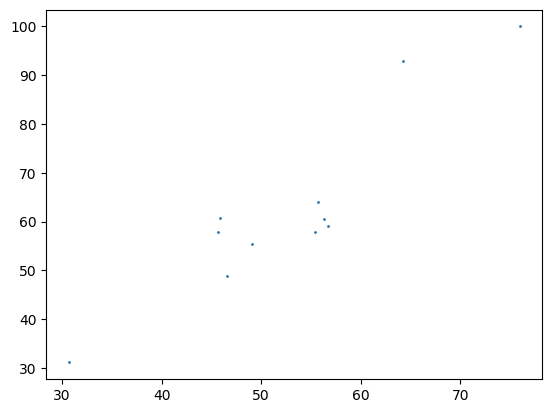

PyObject <matplotlib.collections.PathCollection object at 0x000000005C6326D8>

In [80]:
barcode_data = barcode(persist_diag, dim = 0);
barcode_data = barcode(persist_diag);

# normalize by maximum coordinate value
barcode_coord_vals = sort(unique(collect(Iterators.flatten(barcode_data))));
max_coord = maximum(barcode_coord_vals)
# if max value is Inf, normalize by second largest values
if max_coord == Inf
    max_coord = barcode_coord_vals[end-1]
end

@assert max_coord != Inf

# replace Inf values
replace!(barcode_data, Inf=>max_coord);

# normalize
barcode_data = barcode_data/maximum(barcode_data);

# scale
barcode_data = barcode_data * 100.0;

# plot rescaled data
scatter(barcode_data[:,1], barcode_data[:,2], s=1)

In [81]:
persimg = transformdiagram(barcode_data, pixels=(100,100), σ=0.3)

# normalize image
persimg = (persimg .- minimum(persimg))/(maximum(persimg)-minimum(persimg))

100×100 Array{Float64,2}:
 6.75855e-316  5.74252e-315  5.74256e-315  …  5.00086e-42   6.60449e-48 
 6.75856e-316  5.74252e-315  5.74256e-315     8.25305e-45   1.08996e-50 
 6.75856e-316  5.74252e-315  5.74256e-315     2.24778e-50   2.96857e-56 
 6.75857e-316  5.74252e-315  5.74256e-315     1.01033e-58   1.33431e-64 
 6.75857e-316  5.74252e-315  5.74256e-315     7.49444e-70   9.89768e-76 
 6.75858e-316  5.74252e-315  0.0           …  9.17458e-84   1.21166e-89 
 6.75858e-316  5.74252e-315  0.0              1.85354e-100  2.44795e-106
 6.75858e-316  5.74252e-315  0.0              3.47835e-88   8.63674e-88 
 6.75859e-316  5.74253e-315  0.0              1.45491e-67   3.61254e-67 
 6.75859e-316  5.74253e-315  0.0              1.00431e-49   2.49371e-49 
 7.26734e-316  4.33566e-314  1.12001e-311  …  1.14412e-34   2.84085e-34 
 2.55082e-277  1.88595e-274  5.61569e-272     2.15102e-22   5.34096e-22 
 2.11071e-240  1.56055e-237  4.64677e-235     6.67397e-13   1.65715e-12 
 ⋮                       

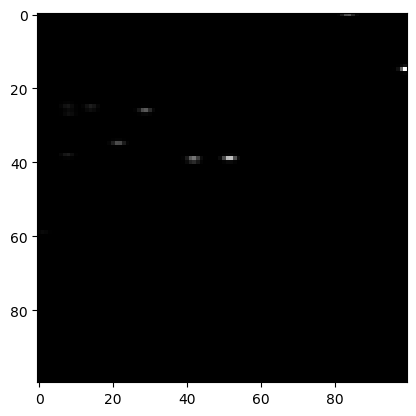

PyObject <matplotlib.image.AxesImage object at 0x000000005FB8EF98>

In [82]:
imshow(persimg, cmap="gray")